# Feature Detection

#### The SIFT & SURF algorithms are patented by their respective creators, and while they are free to use in academic and research settings, you should technically be obtaining a license/permission from the creators if you are using them in a commercial (i.e. for-profit) application.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
image = cv2.imread('input.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)

(287, 500, 3)


## SIFT



In [5]:
#Create SIFT Feature Detector object
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()


Number of keypoints Detected:  774


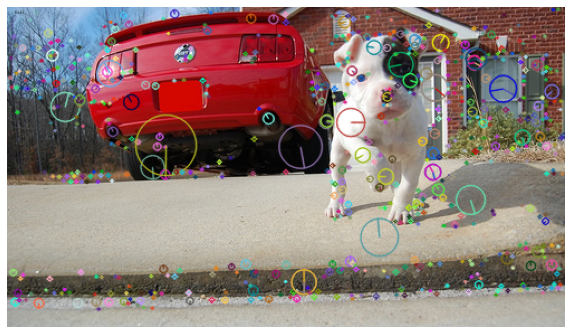

In [6]:
#Detect key points
keypoints_sift, des_sift = sift.detectAndCompute(gray, None)
print("Number of keypoints Detected: ", len(keypoints_sift))

# Draw rich key points on input image
img2 = cv2.drawKeypoints(image, keypoints_sift, outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## Print the keypoints

In [7]:
#Print the keypoints x, y, scale/size, angle, octave

pts = np.array([key_point.pt for key_point in keypoints_sift]).reshape(-1, 2)
scales = np.array([key_point.size for key_point in keypoints_sift]).reshape(-1, 1)
orientations = np.array([key_point.angle for key_point in keypoints_sift]).reshape(-1, 1)
responses = np.array([key_point.response for key_point in keypoints_sift]).reshape(-1, 1)
octaves = np.array([key_point.octave for key_point in keypoints_sift]).reshape(-1, 1)

print(pts.shape,scales.shape,orientations.shape,responses.shape,octaves.shape)

# If you want to print as a list
#index = []
#for point in keypoints_sift:
#    temp = (point.pt, point.size, point.angle, point.response, point.octave, 
#        point.class_id) 
#    index.append(temp)


(774, 2) (774, 1) (774, 1) (774, 1) (774, 1)


## Print the descriptor

In [8]:
print(des_sift.shape)

(774, 128)


## FAST


Number of keypoints Detected:  107


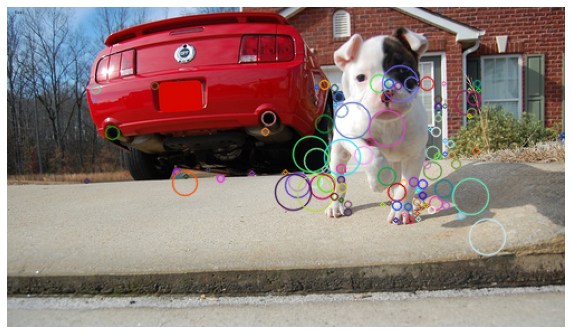

In [9]:
# Create FAST Detector object
fast = cv2.xfeatures2d.StarDetector_create()

# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints = fast.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))


# Draw rich keypoints on input image
img2 = cv2.drawKeypoints(image, keypoints, outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [10]:
#Print the keypoints x, y, scale/size, angle, octave

pts = np.array([key_point.pt for key_point in keypoints]).reshape(-1, 2)
scales = np.array([key_point.size for key_point in keypoints]).reshape(-1, 1)
orientations = np.array([key_point.angle for key_point in keypoints]).reshape(-1, 1)
responses = np.array([key_point.response for key_point in keypoints]).reshape(-1, 1)
octaves = np.array([key_point.octave for key_point in keypoints]).reshape(-1, 1)
print(pts.shape,scales.shape,orientations.shape,responses.shape,octaves.shape)

(107, 2) (107, 1) (107, 1) (107, 1) (107, 1)


## BRIEF Descriptors with FAST Detected Keypoints


Number of keypoints Detected:  107
Descriptors Detected:  (107, 32)


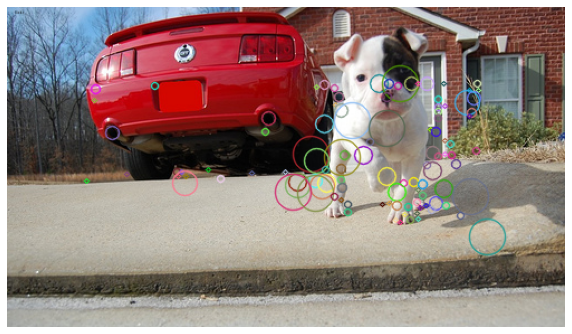

In [11]:
# Create FAST detector object
fast = cv2.xfeatures2d.StarDetector_create()


# Create BRIEF extractor object
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Determine key points
keypoints = fast.detect(gray, None)

# Obtain descriptors and new final keypoints using BRIEF
keypoints, descriptors = brief.compute(gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))
print("Descriptors Detected: ", descriptors.shape)

# Draw rich keypoints on input image
img2 = cv2.drawKeypoints(image, keypoints,outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                                    
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## Oriented FAST and Rotated BRIEF (ORB)


Number of keypoints Detected:  492
Descriptors Detected:  (492, 32)


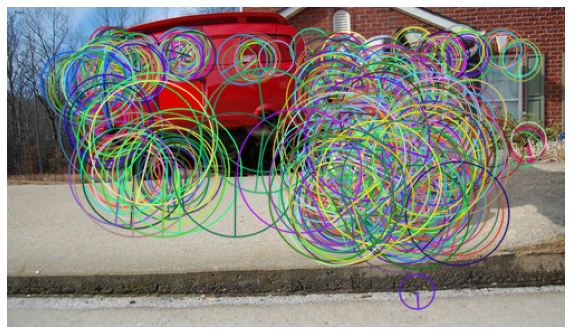

In [12]:
# Create ORB object, we can specify the number of key points we desire
orb = cv2.ORB_create()

# Determine key points
keypoints = orb.detect(gray, None)

# Obtain the descriptors
keypoints, descriptors = orb.compute(gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))
print("Descriptors Detected: ", descriptors.shape)

# Draw rich keypoints on input image
img2 = cv2.drawKeypoints(image, keypoints, outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [13]:
print(keypoints[0].pt)

(221.0, 48.0)


## SURF


#Create SURF Feature Detector object -- have to install with pip
surf = cv2.xfeatures2d.SURF_create()#cv2.SURF_create()

# Only features, whose hessian is larger than hessianThreshold are retained by the detector
surf.hessianThreshold = 500
keypoints, descriptors = surf.detectAndCompute(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich key points on input image
img2 = cv2.drawKeypoints(image, keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

am-bulldog/american_bulldog_196.jpg


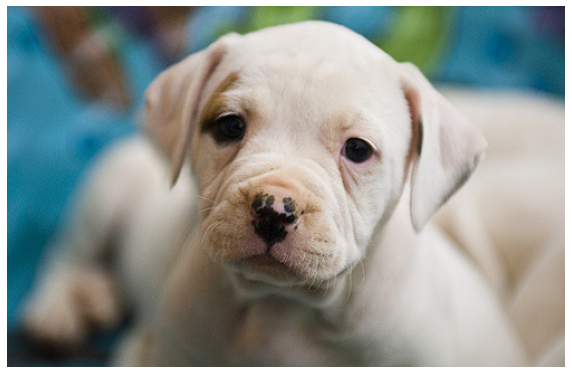

In [16]:
folder1 = 'am-bulldog'
list_of_files = os.listdir(folder1)
print(os.path.join(folder1,list_of_files[0]))
first_img = cv2.imread(os.path.join(folder1,list_of_files[0]))
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(first_img, cv2.COLOR_BGR2RGB))

In [17]:
keypoints_sift, des_sift = sift.detectAndCompute(first_img, None)
print("Number of keypoints Detected: ", len(keypoints_sift))


Number of keypoints Detected:  201


In [18]:
print(des_sift.shape)

(201, 128)


In [19]:
print(np.transpose(des_sift).shape)

(128, 201)


In [37]:
# Perform k-means on the dataset
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS
# Apply KMeans with number of centers, k=3
compactness,labels,centers = cv2.kmeans(des_sift,3,None,criteria,10,flags)
print(centers.shape)

(3, 128)


In [33]:
A = des_sift[labels.ravel()==0] #features close to center 0, note we are using number of clusters or centers = 3
B = des_sift[labels.ravel()==1] #features close to center 1, note we are using number of clusters or centers = 3
C = des_sift[labels.ravel()==1] #features close to center 1, note we are using number of clusters or centers = 3
print(A.shape)
print(B.shape)
print(C.shape)

(67, 128)
(55, 128)
(55, 128)


In [ ]:
# compute label of the centers: assign the label corresponding majority vote to its closest features

# compute the labels of the test dataset by assigning label of the center closest to each of the test image

# compute accuracy